In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pickle 


In [2]:
dados = pd.read_csv("artificial1d.csv")

In [3]:
#PRÉ-PROCESSAMENTO

dados.head(6)

type(dados["-1,00E+18"][5])

#Convertendo string para float

dd =  dados.apply(lambda x: x.str.replace(',', '.').astype(float) if x.dtype == "object" else x)

dd["-1,00E+18"]

dd.shape



(29, 2)

In [4]:
# Simular dados de entrada (X) e saída (y)


X = dd["-1,00E+18"].values.reshape(-1, 1)  # Transforma em array numpy 2D
y = dd["-2,08E+18"].values.reshape(-1, 1)  # Garante que y também seja 2D para alinhamento

#Normalizando os dados de entrada X

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X é sua matriz de características

MSE: 2.0819318964636135e+35
Weights: [[8.81798993e+17]]
Bias: 1.2534034518255458e+17


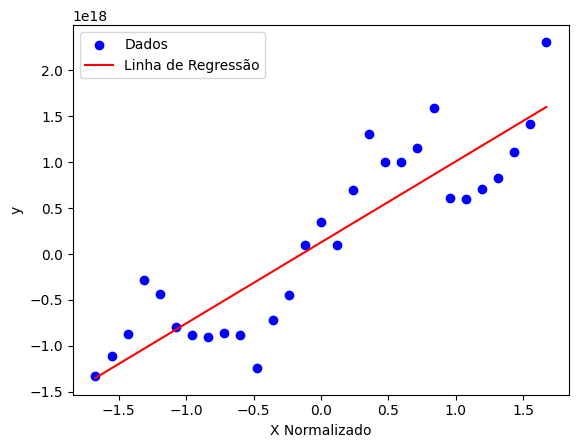

In [5]:


class LinearRegressionSGD:
    def __init__(self, learning_rate=0.1, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        for _ in range(self.n_iterations):
            for i in range(n_samples):
                random_index = np.random.randint(n_samples)
                xi = X[random_index:random_index+1]
                yi = y[random_index:random_index+1]
                y_predicted = np.dot(xi, self.weights) + self.bias
                error = y_predicted - yi
                dw = (2) * np.dot(xi.T, error)
                db = (2) * np.sum(error)
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
    
    def mean_squared_error(self, X, y):
        # Calcula o MSE
        predictions = self.predict(X)
        return np.mean((predictions - y) ** 2)

# Supondo que X_scaled e y já estejam definidos e normalizados
# X_scaled = scaler.fit_transform(X)  # X é sua matriz de características
# y = ...

model = LinearRegressionSGD(learning_rate=0.01, n_iterations=1000)
model.fit(X_scaled, y)

predictions = model.predict(X_scaled)


print(f"MSE: {model.mean_squared_error(X_scaled, y)}")
print(f"Weights: {model.weights}")
print(f"Bias: {model.bias}")


#Plotando matplotlib
plt.scatter(X_scaled, y, color='blue', label='Dados')
plt.plot(X_scaled, predictions, color='red', label='Linha de Regressão')
plt.xlabel('X Normalizado')
plt.ylabel('y')
plt.legend()
plt.show()
